In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

%matplotlib inline

In [2]:
def data_seperator(data, depend):
    select = [data.columns[i] for i in np.where(data.dtypes == 'O')[0]]
    data_categ = pd.DataFrame(data[select])
    
    data_num = data.drop(select, axis=1)
    data_num = data_num.drop([depend], axis=1)
    
    data_depend = data[depend]
    
    select = [i for i in data_num.columns if 'year' in i.lower() or 'yr' in i.lower() or 'day' in i or 'week' in i.lower()]
    data_time = pd.DataFrame(data_num[select])
    data_num = data_num.drop(select, axis=1)
    
    select = [feature for feature in data_num if len(data_num[feature].unique()) < 25]
    data_discrete = pd.DataFrame(data_num[select])
    data_continuous = data_num.drop(select, axis=1)

    return data_num, data_discrete, data_continuous, data_categ, data_time, data_depend

In [3]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data_num, data_discrete, data_continuous, data_categ, data_time, data_depend = data_seperator(data.copy(), "Selling_Price")

In [6]:
data_time['Current_Year'] = np.datetime64('today', 'Y')
data_time['Current_Year'] = pd.DatetimeIndex(data_time['Current_Year']).year
data_time['No_of_Years'] = data_time['Current_Year'] - data_time['Year']
data_time = data_time.drop(['Year', 'Current_Year'], axis=1)
data_time.head()

,No_of_Years
0,8
1,9
2,5
3,11
4,8


In [7]:
data_categ = data_categ.drop(['Car_Name'], axis=1)

In [8]:
data_categ = pd.get_dummies(data_categ, drop_first=True)
data_categ.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [9]:
data = pd.concat([data_continuous, data_discrete, data_categ, data_time, data_depend], axis=1)

In [10]:
data.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Years,Selling_Price
0,5.59,27000,0,0,1,0,1,8,3.35
1,9.54,43000,0,1,0,0,1,9,4.75
2,9.85,6900,0,0,1,0,1,5,7.25
3,4.15,5200,0,0,1,0,1,11,2.85
4,6.87,42450,0,1,0,0,1,8,4.60


<AxesSubplot:>

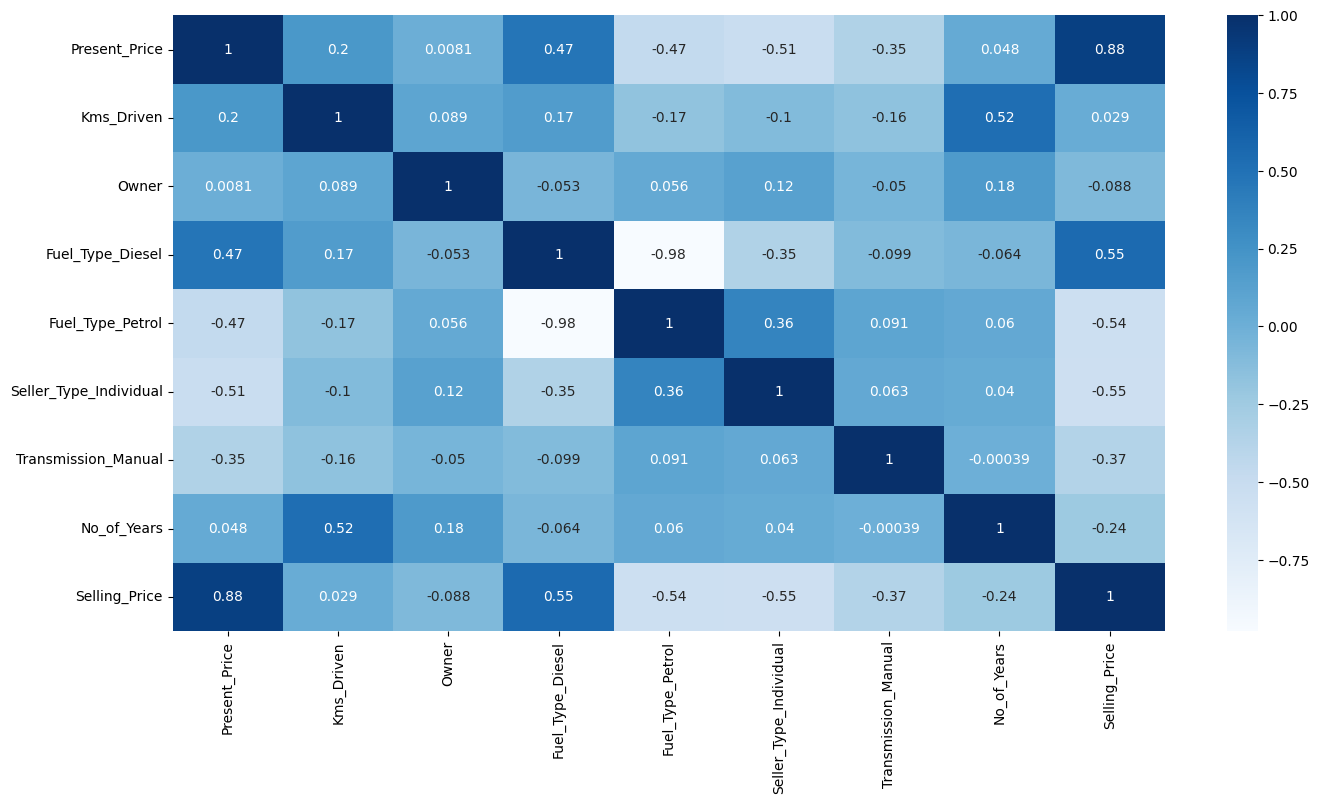

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(data=data.corr(), annot=True, cmap='Blues')

Taking all features anyway

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop(['Selling_Price', 'Present_Price'], axis=1)
y = data.Selling_Price

# Splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = model.predict(x_test)
y_pred

array([ 9.0865    ,  0.7545    ,  8.1115    , 10.9352    , 24.2745    ,
        5.652     ,  3.304     ,  1.355     ,  4.8795    ,  3.8845    ,
        2.876     ,  1.355     ,  6.2325    ,  8.546     ,  8.7901    ,
       10.062875  ,  8.4833    ,  5.885     ,  0.42615   ,  1.0105    ,
        3.978     ,  5.903     ,  4.8905    ,  6.1848    ,  0.221     ,
        1.078     ,  0.4296    ,  0.42576667,  0.5998    ,  3.92      ,
       10.6725    ,  5.56704167,  0.44426667,  8.8325    ,  3.452     ,
        0.629225  ,  7.12571667,  8.4255    ,  0.2891    ,  7.3955    ,
       10.3927    , 20.0385    ,  6.159     ,  4.96633333,  5.39970833,
       10.9007    ,  0.4877375 ,  1.0648    ,  5.317     , 10.854     ,
        6.907     ,  7.565275  ,  3.952     , 21.986     ,  0.836     ,
        0.511     ,  1.784     ,  3.1605    ,  6.3045    ,  1.0269    ,
        1.701     ])

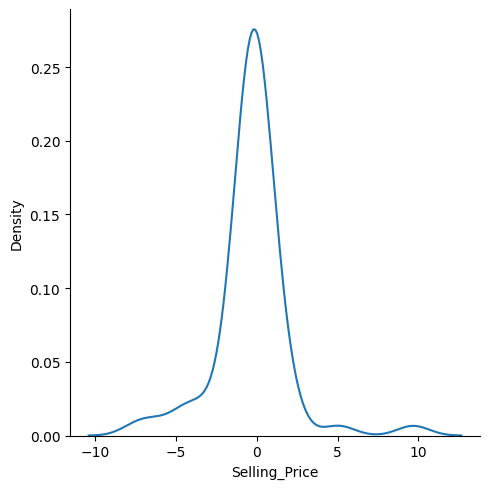

In [15]:
sns.displot(data=y_test - y_pred, kind='kde')

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7978294432206865

In [17]:
import pickle

with open('model_pickled.pkl', 'wb') as f: 
    file = f
    pickle.dump(model, f)

In [19]:
x_test.head()

,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Years
223,61381,0,1,0,0,1,7
150,6000,0,0,1,1,1,11
226,24678,0,0,1,0,1,7
296,33988,0,1,0,0,1,6
52,15000,0,1,0,0,0,5
